##### Paul Mc Grath - Machine Learning & Stats- Winter 2022 Module- Assessment  
---

# Statistics- Introduction

### Null Hypothesis

In scientific research, the null hypothesis (often denoted H0) is the claim that no difference or relationship exists between two sets of data or variables being analyzed. The null hypothesis is that any experimentally observed difference is due to *chance alone*, and an underlying causative relationship does not exist, hence the term "null". In addition to the null hypothesis, an alternative hypothesis (often denoted HA or H1) is also developed, which claims that *a relationship does exist between two variables*.

The statement being tested in a test of statistical significance is called the null hypothesis. The test of significance is designed to assess the strength of the evidence against the null hypothesis. Usually, the null hypothesis is a statement of *'no effect' or 'no difference 'H0'*.

##### Statistical significance test:

Take a random sample from the population.

-  If the sample data are consistent with the null hypothesis, then: do not reject the null hypothesis.
-  If the sample data are inconsistent with the null hypothesis, then reject the null hypothesis and conclude that the alternative hypothesis is true.

##### Contingency Table

In statistics, a contingency table is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables.
Contingency tables classify outcomes for one variable in rows and the other in columns.
The values at the row and column intersections are frequencies for each unique combination of the two variables.

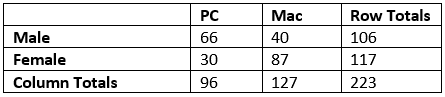

An odds ratio (OR) is a statistic that quantifies the strength of the association between two events, A and B. The odds ratio is defined as the ratio of the odds of A in the presence of B and the odds of A in the absence of B, or equivalently (due to symmetry), the ratio of the odds of B in the presence of A and the odds of B in the absence of A. Two events are independent if and only if the OR equals 1, i.e., the odds of one event are the same in either the presence or absence of the other event. If the OR is greater than 1, then A and B are associated (correlated) in the sense that, compared to the absence of B, the presence of B raises the odds of A, and symmetrically the presence of A raises the odds of B. Conversely, if the OR is less than 1, then A and B are negatively correlated, and the presence of one event reduces the odds of the other event.

The null hypothesis is that the true odds ratio of the populations underlying the observations is one, and the observations were sampled from these populations under a condition: the marginals of the resulting table must equal those of the observed table. The statistic returned is the unconditional maximum likelihood estimate of the odds ratio, and the p-value is the probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed. 

#### Setup the necessary prerequisites for the notebook

In [1]:
# set outputs to 3 decimal places
%precision %.3f

'%.3f'

In [2]:
# Download required libraries

# Efficient numerical arrays.
import numpy as np
import itertools
import math
import random

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

#### Fisher Tea Test Background

The Lady Tasting Tea problem was first described by <a href="http://www-history.mcs.st-andrews.ac.uk/Biographies/Fisher.html" style="color: #ff791e">Ronald A. Fisher</a> in his book The Design of Experiments.

<img src="https://www.sciencehistory.org/sites/default/files/styles/rte_full_width/public/rte/fisher_as_young_man.jpg" style="border: 1px solid #ff791e" width="200px">

[Fisher Tea Test Background](https://www.sciencehistory.org/distillations/ronald-fisher-a-bad-cup-of-tea-and-the-birth-of-modern-statistics "Ronald Fisher, a Bad Cup of Tea, and the Birth of Modern Statistics") <br>


Fisher described the tea tasting problem as follows.

> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.

> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

> In the book, Fisher describes the *null hypothesis*. <u>It is the statement to be countered by the experiment.</u>  
In this case it is the hypothesis that the subject cannot tell the difference between a cup of tea that had milk in it first and one that had the tea in it first.  
<br>
**Null Hypothesis:** <u>the subject can not tell if the cup had milk in it first or last.</u>  
Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true. If it is very unlikely, then we may reject the null hypothesis. Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.  
<br>
**Alternative Hypothesis:** <u>the subject can tell.</u>
<br>Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing. Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

The concept of a null hypothesis is used differently in two approaches to statistical inference. In the significance testing approach of Ronald Fisher, a null hypothesis is rejected if the observed data are significantly unlikely to have occurred if the null hypothesis were true: *the number of cups that were correctly chosen is by chance alone*.  
In this case, the null hypothesis is rejected and an alternative hypothesis is accepted in its place: *the number of cups that were correctly chosen is more than predicted by chance alone*.  <br> <br>In summary: The hypothesis that chance alone is responsible for the results of the experiment is called the null hypothesis. 

Let us investigate the number of ways in which the lady can arrange the eight cups into two groups of four.
- The first group is the cups with milk first.
- The second group is the cups with tea first.
- Once we select four cups for the first group, the second group is made up of the remaining cups.
- So, we only really need to count how many different ways there are to select four cups from eight.
- To begin we give each of the eight cups a label from 0 to 7.
- Note that the cups have no order in the experiment, we are labelling them with integers simply for convenience.

In [3]:
# Python code for the eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

- We can assume the subject is trying to pick the four cups with milk in first.<br>
- If the subject is picking the cups randomly then they are randomly picking one of seventy different options.<br>
- By randomly, we mean that they can not really tell which cups have the milk in first.<br>
- Therefore they have only a probability of 1/70 of getting the right answer.

The number of ways of selecting four things from eight where the order doesnt matter  
**(8*7*6*5)/(4*3*2*1)**

8 cups randomly labelled: 0 1 2 3 4 5 6 7.  
4 spots:  _ _ _ _.  Select the 1st cup with tea in them.  
For example say 1st cup chosen is 2, then 0, then 7 then 5. 
1st 4 spots: 2 0 7 5.  
1st spot have 8 selection possibilities.  
Thereafter 2nd spot have 7 selection possibilities.  
3rd spot: have 6 selection possibilities.  
4th spot: have 5 selection possibilities and so on.
Therefore there are (8x7x6x5) ways to choose/possibilities.  
The order within group is not important.  Just that the cup is in the right group.  
i.e.  i.e. 2-0-7-5 same as 0-2-7-5 (these are in the 4 cups of Group 1 (tea first)).  
Therefore we have to take in to account how many times have we double counted the same combination.      
We now need to remove the potential duplicates. Dividing (8x7x6x5) by(4x3x2x1) does this.  
This results in 70 possibilities to select the cups at random.
Just one of these will get the 4 right cups in Group 1.  
It works out that there is a 1/70 chance or 1.4% the taster will get the 4 'correct' cups right by chance.  

#### Itertools
Itertools is a package in python that returns the *distict number* of ways of selecting *n* unordered items from a list of elements/numbers *n*.  


In [4]:
# use of itertools function from python. 
# Itertools returns the number of distinct Returns 70 rows (70 combinations) for 8 cups declared above
# Note 1:  index goes from 0-7
# Note 2: Itertools starts below with 0,1,2,3 but this is simply the computer way of displaying a list of integers.  
# If this is removed there is no reason to start with 0,1,2,3.etc
poss = list(itertools.combinations(cups, 4))
poss[0:10]
# poss[0:70] returns all combinations

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5)]

In [5]:
# Only one of the 70 randomly selected possibilities is the desired result.
# i.e. the cups chosen are the correct 4 cups (milk first or tea first)
# Thus 1 in 70 chance or:
1/70

0.014

We have seen above that with 8 cups of tea the probability of randomly selecting the correct cups is equal to 0.014 or **1.4%**.  
We can use the maths library from python to try to find the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to **1%**.

Similar to itertools we can do this with the help of Python Maths libraries

In [6]:
# number of ways of selecting 4 cups from 8 (number of choices)
math.comb(8,4)

70

In [7]:
# probability of selecting 4 cups from 8 is 1/(number of choices)
1.0/math.comb(8,4)

0.014

In [8]:
# probability of selecting 4 cups from 8 - as a percentage
1.0/math.comb(8,4)*100

1.429

i.e. for the tea experiment with 8 cups - 4 tea first, 4 milk first the probability of selecting a given combination is approx 1.5%  as was quoted above

# Statisitics Exercises

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

#### Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.


In [9]:
# Number of combinations from selecting correct 5 cups from 10 is:
math.comb(10,5)

252

In [10]:
# Probability of randonly selecting correct 5 cups from 10 is:
1.0/math.comb(10,5)

0.004

In [11]:
# Probability as a percentage:
1.0/math.comb(10,5)*100

0.397

So if the experiment was done with 10 cups total, five with milk in first and five with tea in first, <br> then the chance of selecting correctly randomly is **much** less than 1%.<br>
Lets try 9 cups.

In [12]:
# number of ways of selecting 4 cups from 9
math.comb (9,5)

126

In [13]:
# Probability of randonly selecting correct 4 (or 5) cups from 9 -as a percentage is:
1.0/math.comb(9,4)*100

0.794

##### Thus choosing 4 cups with milk first from 10 cups the chances of correct selections based on random selection is 0.004 or circa **0.4%**

##### Choosing 4 cups with milk first from 9 cups the chances of correct selections based on random selection is 0.00794 or circa **0.8%**.

#### Answer is 9 cups.

<br>

#### *Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

First lets re-look at the original experiment from above:

In [14]:
# number of ways of selecting 3 cups from 8 (number of choices)
math.comb(8,3)

56

In [15]:
# probability of selecting 3 cups from 8 is 1/(number of choices)
1.0/math.comb(8,3)

0.018

In [16]:
# probability of selecting 3 cups from 8 - as a percentage
1.0/math.comb(8,3)*100

1.786

##### Thus the probability of selecting 3 correct from the 8 cups is >1%.  We need to add more 'random' cups.  Lets look at using a set of 9 cups.

In [17]:
# number of ways of selecting 3 cups from 9 (number of choices)
math.comb(9,3)

84

In [18]:
# probability of selecting 3 cups from 9 is 1/(number of choices)
1.0/math.comb(9,3)

0.012

In [19]:
# probability of selecting 3 cups from 9 - as a percentage
1.0/math.comb(9,3)*100

1.190

##### Thus the probability of selecting 3 correct from the 9 cups is still >1%.  We need to add more 'random' cups.  Lets look at using a set of 10 cups.

In [20]:
# number of ways of selecting 3 cups from 10 (number of choices)
math.comb(10,3)

120

In [21]:
# probability of selecting 3 cups from 9 is 1/(number of choices)
1.0/math.comb(10,3)

0.008

In [22]:
# probability of selecting 3 cups from 9 - as a percentage
1.0/math.comb(10,3)*100

0.833

### Thus 10 cups would be required if we were to let the taster get one cup wrong while maintaining the 1% threshold? 
<br>


### Exercise 2

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

Perform a Fisher exact test on a 2x2 contingency table.

In [23]:
# statistical using fisher exact get to similar output as itertools methods
import scipy.stats as ss

##### First look at the source code.  

1. click on the scipy stats link
2. Click on the source code button
3. This took us direct to the github source page
4. The scipy.stats/fisher_exact code was highlighted along with the wording used in scipy.stats webpage
5. The code is python and can be seen from rows 4492 onwards
6. The function is "def fisher_exact(table, alternative='two-sided')" runs from 4669 to 4731
7. The def fisher_exact(table, alternative='two-sided') returns ""return SignificanceResult(oddsratio, pvalue)""
8. Thus it returns the odd ratio and p value


##### Using Math/itertools

In [24]:
# Python code for the eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

In [25]:
# number of ways of selecting 4 cups from 8 (number of choices)
math.comb(8,4)

70

In [26]:
import itertools
# package in python that returns/generates each way of selecting n unordered items from a list of elements/numbers n
poss = list(itertools.combinations(cups, 4))
poss

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

In [33]:
# Only one of the 70 randomly selected possibilities is the desired result.
# i.e. the cups chosen are the correct 4 cups (milk first or tea first)
# Thus 1 in 70 chance or:
1/70

0.014

In [34]:
# probability of selecting 4 cups from 8 is 1/(number of choices)
1.0/math.comb(8,4)

0.014

##### Using scipy.fisher_exact

In [27]:
# execute the fisher_exact on a 4X4 contingency table
# as we have 4 cups x 4 cups in our tea test
ss.fisher_exact([[4,0], [0,4]])

SignificanceResult(statistic=inf, pvalue=0.028571428571428567)

In [35]:
# using fisher_exact
ss.fisher_exact([[4,0], [0,4]])

SignificanceResult(statistic=inf, pvalue=0.028571428571428567)

Itertools for 4 x 4 returns a p value of 0.014285.  
Whereas scipy.disher_exact returns a pvalue=0.028571428571428567.

In [30]:
ratio = (0.028571428571428567/0.014285)
ratio

2.000

Thus the p value returned by math is twice that than returned by fisher_exact.  
Thus the fisher exact returns a p value of double the chance of overturning the null hypothesis

When the code was extracted from scipy to the below jupyter field it returns an error.  
'distributions' is not defined.  
I tried to update scipy_stats version using pip install but it returned that my code was up to date.  
Thus the code will not run independently.  
Thus I was unable to modify the code and see what functioanlity would give the same result as itertools/math.  

In [31]:
def fisher_exact(table, alternative='two-sided'):
    """Perform a Fisher exact test on a 2x2 contingency table.
    The null hypothesis is that the true odds ratio of the populations
    underlying the observations is one, and the observations were sampled
    from these populations under a condition: the marginals of the
    resulting table must equal those of the observed table. The statistic
    returned is the unconditional maximum likelihood estimate of the odds
    ratio, and the p-value is the probability under the null hypothesis of
    obtaining a table at least as extreme as the one that was actually
    observed. There are other possible choices of statistic and two-sided
    p-value definition associated with Fisher's exact test; please see the
    Notes for more information.
    Parameters
    ----------
    table : array_like of ints
        A 2x2 contingency table.  Elements must be non-negative integers.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis.
        The following options are available (default is 'two-sided'):
        * 'two-sided': the odds ratio of the underlying population is not one
        * 'less': the odds ratio of the underlying population is less than one
        * 'greater': the odds ratio of the underlying population is greater
          than one
        See the Notes for more details.
    Returns
    -------
    oddsratio : float
        This is prior odds ratio and not a posterior estimate.
    p_value : float
        P-value, the probability under the null hypothesis of obtaining a
        table at least as extreme as the one that was actually observed.
    See Also
    --------
    chi2_contingency : Chi-square test of independence of variables in a
        contingency table.  This can be used as an alternative to
        `fisher_exact` when the numbers in the table are large.
    barnard_exact : Barnard's exact test, which is a more powerful alternative
        than Fisher's exact test for 2x2 contingency tables.
    boschloo_exact : Boschloo's exact test, which is a more powerful alternative
        than Fisher's exact test for 2x2 contingency tables.
    Notes
    -----
    *Null hypothesis and p-values*
    The null hypothesis is that the true odds ratio of the populations
    underlying the observations is one, and the observations were sampled at
    random from these populations under a condition: the marginals of the
    resulting table must equal those of the observed table. Equivalently,
    the null hypothesis is that the input table is from the hypergeometric
    distribution with parameters (as used in `hypergeom`)
    ``M = a + b + c + d``, ``n = a + b`` and ``N = a + c``, where the
    input table is ``[[a, b], [c, d]]``.  This distribution has support
    ``max(0, N + n - M) <= x <= min(N, n)``, or, in terms of the values
    in the input table, ``min(0, a - d) <= x <= a + min(b, c)``.  ``x``
    can be interpreted as the upper-left element of a 2x2 table, so the
    tables in the distribution have form::
        [  x           n - x     ]
        [N - x    M - (n + N) + x]
    For example, if::
        table = [6  2]
                [1  4]
    then the support is ``2 <= x <= 7``, and the tables in the distribution
    are::
        [2 6]   [3 5]   [4 4]   [5 3]   [6 2]  [7 1]
        [5 0]   [4 1]   [3 2]   [2 3]   [1 4]  [0 5]
    The probability of each table is given by the hypergeometric distribution
    ``hypergeom.pmf(x, M, n, N)``.  For this example, these are (rounded to
    three significant digits)::
        x       2      3      4      5       6        7
        p  0.0163  0.163  0.408  0.326  0.0816  0.00466
    These can be computed with::
        >>> from scipy.stats import hypergeom
        >>> table = np.array([[6, 2], [1, 4]])
        >>> M = table.sum()
        >>> n = table[0].sum()
        >>> N = table[:, 0].sum()
        >>> start, end = hypergeom.support(M, n, N)
        >>> hypergeom.pmf(np.arange(start, end+1), M, n, N)
        array([0.01631702, 0.16317016, 0.40792541, 0.32634033, 0.08158508,
               0.004662  ])
    The two-sided p-value is the probability that, under the null hypothesis,
    a random table would have a probability equal to or less than the
    probability of the input table.  For our example, the probability of
    the input table (where ``x = 6``) is 0.0816.  The x values where the
    probability does not exceed this are 2, 6 and 7, so the two-sided p-value
    is ``0.0163 + 0.0816 + 0.00466 ~= 0.10256``::
        >>> from scipy.stats import fisher_exact
        >>> oddsr, p = fisher_exact(table, alternative='two-sided')
        >>> p
        0.10256410256410257
    The one-sided p-value for ``alternative='greater'`` is the probability
    that a random table has ``x >= a``, which in our example is ``x >= 6``,
    or ``0.0816 + 0.00466 ~= 0.08626``::
        >>> oddsr, p = fisher_exact(table, alternative='greater')
        >>> p
        0.08624708624708627
    This is equivalent to computing the survival function of the
    distribution at ``x = 5`` (one less than ``x`` from the input table,
    because we want to include the probability of ``x = 6`` in the sum)::
        >>> hypergeom.sf(5, M, n, N)
        0.08624708624708627
    For ``alternative='less'``, the one-sided p-value is the probability
    that a random table has ``x <= a``, (i.e. ``x <= 6`` in our example),
    or ``0.0163 + 0.163 + 0.408 + 0.326 + 0.0816 ~= 0.9949``::
        >>> oddsr, p = fisher_exact(table, alternative='less')
        >>> p
        0.9953379953379957
    This is equivalent to computing the cumulative distribution function
    of the distribution at ``x = 6``:
        >>> hypergeom.cdf(6, M, n, N)
        0.9953379953379957
    *Odds ratio*
    The calculated odds ratio is different from the one R uses. This SciPy
    implementation returns the (more common) "unconditional Maximum
    Likelihood Estimate", while R uses the "conditional Maximum Likelihood
    Estimate".
    Examples
    --------
    Say we spend a few days counting whales and sharks in the Atlantic and
    Indian oceans. In the Atlantic ocean we find 8 whales and 1 shark, in the
    Indian ocean 2 whales and 5 sharks. Then our contingency table is::
                Atlantic  Indian
        whales     8        2
        sharks     1        5
    We use this table to find the p-value:
    >>> from scipy.stats import fisher_exact
    >>> oddsratio, pvalue = fisher_exact([[8, 2], [1, 5]])
    >>> pvalue
    0.0349...
    The probability that we would observe this or an even more imbalanced ratio
    by chance is about 3.5%.  A commonly used significance level is 5%--if we
    adopt that, we can therefore conclude that our observed imbalance is
    statistically significant; whales prefer the Atlantic while sharks prefer
    the Indian ocean.
    """
    hypergeom = distributions.hypergeom
    # int32 is not enough for the algorithm
    c = np.asarray(table, dtype=np.int64)
    if not c.shape == (2, 2):
        raise ValueError("The input `table` must be of shape (2, 2).")

    if np.any(c < 0):
        raise ValueError("All values in `table` must be nonnegative.")

    if 0 in c.sum(axis=0) or 0 in c.sum(axis=1):
        # If both values in a row or column are zero, the p-value is 1 and
        # the odds ratio is NaN.
        return np.nan, 1.0

    if c[1, 0] > 0 and c[0, 1] > 0:
        oddsratio = c[0, 0] * c[1, 1] / (c[1, 0] * c[0, 1])
    else:
        oddsratio = np.inf

    n1 = c[0, 0] + c[0, 1]
    n2 = c[1, 0] + c[1, 1]
    n = c[0, 0] + c[1, 0]

    def pmf(x):
        return hypergeom.pmf(x, n1 + n2, n1, n)

    if alternative == 'less':
        pvalue = hypergeom.cdf(c[0, 0], n1 + n2, n1, n)
    elif alternative == 'greater':
        # Same formula as the 'less' case, but with the second column.
        pvalue = hypergeom.cdf(c[0, 1], n1 + n2, n1, c[0, 1] + c[1, 1])
    elif alternative == 'two-sided':
        mode = int((n + 1) * (n1 + 1) / (n1 + n2 + 2))
        pexact = hypergeom.pmf(c[0, 0], n1 + n2, n1, n)
        pmode = hypergeom.pmf(mode, n1 + n2, n1, n)

        epsilon = 1e-14
        gamma = 1 + epsilon

        if np.abs(pexact - pmode) / np.maximum(pexact, pmode) <= epsilon:
            return oddsratio, 1.

        elif c[0, 0] < mode:
            plower = hypergeom.cdf(c[0, 0], n1 + n2, n1, n)
            if hypergeom.pmf(n, n1 + n2, n1, n) > pexact * gamma:
                return oddsratio, plower

            guess = _binary_search(lambda x: -pmf(x), -pexact * gamma, mode, n)
            pvalue = plower + hypergeom.sf(guess, n1 + n2, n1, n)
        else:
            pupper = hypergeom.sf(c[0, 0] - 1, n1 + n2, n1, n)
            if hypergeom.pmf(0, n1 + n2, n1, n) > pexact * gamma:
                return oddsratio, pupper

            guess = _binary_search(pmf, pexact * gamma, 0, mode)
            pvalue = pupper + hypergeom.cdf(guess, n1 + n2, n1, n)
    else:
        msg = "`alternative` should be one of {'two-sided', 'less', 'greater'}"
        raise ValueError(msg)

    pvalue = min(pvalue, 1.0)

    return oddsratio, pvalue

In [32]:
fisher_exact([[4,0], [0,4]])

NameError: name 'distributions' is not defined

<br>
 
The answer is likely based on the constraints on table shape as fisher test typically assumes 2 x 2 table.  

### End

---